# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 357501308
sectors = np.array([51])

period = 7.4355851542
tdepth = 0.0340956729**2

lc = pd.read_csv("TOI_2018_51.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

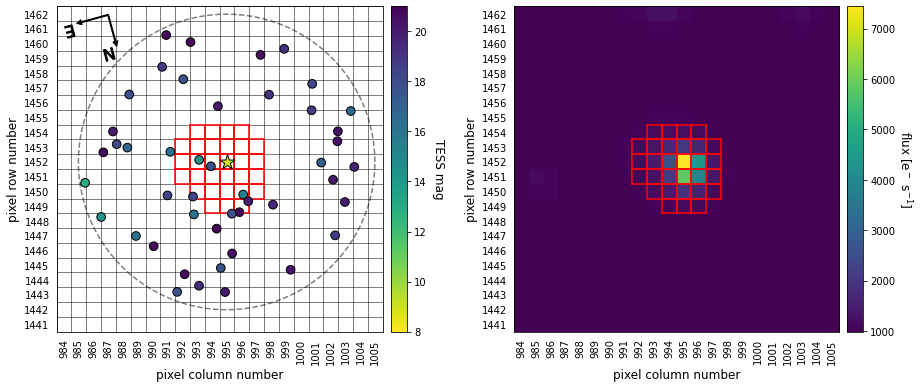

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,357501308,8.9620,7.844,7.255,7.104,229.838138,29.206174,0.660000,0.622512,4218.89,35.690900,0.000,0.000
1,1101309888,17.8009,NaN,NaN,NaN,229.845425,29.206201,NaN,NaN,6111.00,0.291982,22.898,89.753
2,357501306,14.5008,13.815,13.621,13.451,229.849666,29.202560,1.020000,1.634430,5725.00,0.536756,38.490,109.757
3,357501311,15.5002,14.641,14.205,14.118,229.835094,29.220159,0.820000,0.775431,4953.27,0.983739,51.248,349.243
4,1101309889,20.0298,NaN,NaN,NaN,229.833779,29.223229,NaN,NaN,NaN,-1.831570,62.907,347.426
5,357501309,18.2614,16.435,16.001,15.678,229.856899,29.215744,NaN,NaN,3498.00,1.470090,68.277,59.694
6,1101309911,20.7817,NaN,NaN,NaN,229.838933,29.226425,NaN,NaN,NaN,NaN,72.947,1.962
7,1101309909,17.7128,NaN,NaN,NaN,229.842364,29.226195,NaN,NaN,6598.00,0.277613,73.287,10.437
8,1101309885,20.0435,NaN,NaN,NaN,229.834911,29.184279,NaN,NaN,NaN,-0.339175,79.473,187.333
9,357501303,16.2133,15.294,14.955,14.922,229.861035,29.196556,0.870000,0.916083,5140.00,0.527408,79.851,115.694


In [4]:
ap = np.array([[994, 1449], [995, 1449], [996, 1449], [993, 1450], [994, 1450], [995, 1450],
               [996, 1450], [997, 1450], [992, 1451], [993, 1451], [994, 1451], [995, 1451],
               [996, 1451], [997, 1451], [992, 1452], [993, 1452], [994, 1452], [995, 1452],
               [996, 1452], [997, 1452], [992, 1453], [993, 1453], [994, 1453], [995, 1453],
               [996, 1453], [997, 1453], [993, 1454], [994, 1454], [995, 1454], [996, 1454]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,357501308,8.9620,7.844,7.255,7.104,229.838138,29.206174,0.660000,0.622512,4218.89,35.690900,0.000,0.000,9.910097e-01,0.001173
1,1101309888,17.8009,NaN,NaN,NaN,229.845425,29.206201,NaN,NaN,6111.00,0.291982,22.898,89.753,2.881876e-04,0.000000
2,357501306,14.5008,13.815,13.621,13.451,229.849666,29.202560,1.020000,1.634430,5725.00,0.536756,38.490,109.757,5.887187e-03,0.197465
3,357501311,15.5002,14.641,14.205,14.118,229.835094,29.220159,0.820000,0.775431,4953.27,0.983739,51.248,349.243,2.031451e-03,0.572258
4,1101309889,20.0298,NaN,NaN,NaN,229.833779,29.223229,NaN,NaN,NaN,-1.831570,62.907,347.426,2.293846e-05,0.000000
5,357501309,18.2614,16.435,16.001,15.678,229.856899,29.215744,NaN,NaN,3498.00,1.470090,68.277,59.694,8.329339e-05,0.000000
6,1101309911,20.7817,NaN,NaN,NaN,229.838933,29.226425,NaN,NaN,NaN,NaN,72.947,1.962,8.495816e-06,0.000000
7,1101309909,17.7128,NaN,NaN,NaN,229.842364,29.226195,NaN,NaN,6598.00,0.277613,73.287,10.437,1.445009e-04,0.000000
8,1101309885,20.0435,NaN,NaN,NaN,229.834911,29.184279,NaN,NaN,NaN,-0.339175,79.473,187.333,1.749056e-06,0.000000
9,357501303,16.2133,15.294,14.955,14.922,229.861035,29.196556,0.870000,0.916083,5140.00,0.527408,79.851,115.694,3.635733e-04,0.000000


# Ploting CC File

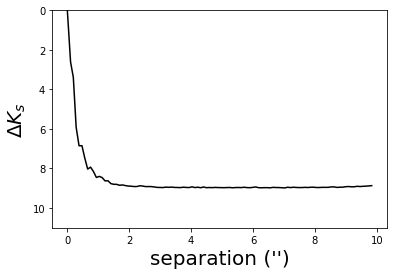

In [6]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(11,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [7]:
%%time
for i in range(11):
    
    lc = pd.read_csv("TOI_2018_51.csv", header=None)
    contrastcurve_file = "Palomar_5m_K.csv"

    band = 'K'
    
    # read in the light curve
    time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
    P_orb = period

    #lc_binsize = (time.max()-time.min())/100
    lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889)
    
    df_results = target.probs
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)
    print("")

Calculating TP scenario probabilitiey for 357501308.
Calculating EB and EBx2P scenario probabilities for 357501308.
Calculating PTP scenario probability for 357501308.
Calculating PEB and PEBx2P scenario probabilities for 357501308.
Calculating STP scenario probability for 357501308.
Calculating SEB and SEBx2P scenario probabilities for 357501308.
Calculating DTP scenario probability for 357501308.
Calculating DEB and DEBx2P scenario probabilities for 357501308.
Calculating BTP scenario probability for 357501308.
Calculating BEB and BEBx2P scenario probabilities for 357501308.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 357501306.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 357501311.
FPP =  1.3872739352827068e-06
NFPP =  1.3352608952813336e-07

Calculating TP scenario probabilitiey for 357501308.
Calculating EB and EBx2P scenario probabilities for 357501308.
Calculating PTP scenario probability for 357501308.
Calculating PEB and PEBx2P scenario probabil

MemoryError: Unable to allocate 7.63 MiB for an array with shape (1000000,) and data type float64

In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  2.004776550323939e-07
NFPP =  1.0190694677982226e-07


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,357501308,TP,0.660000,0.622512,7.435585,89.589940,0.217480,0.367185,279.998595,2.281484,0.000000,0.000000,8.574349e-01
1,357501308,EB,0.660000,0.622512,7.435585,85.868005,1.766218,0.123456,75.048398,0.000000,0.606114,0.598239,7.415781e-75
2,357501308,EBx2P,0.660000,0.622512,14.871170,88.241668,0.655098,0.811716,200.680821,0.000000,0.642547,0.622512,2.833987e-21
3,357501308,PTP,0.660000,0.622512,7.435585,89.522180,0.159274,0.180770,48.623642,2.374990,0.000000,0.000000,5.458427e-03
4,357501308,PEB,0.660000,0.622512,7.435585,85.080238,1.926553,0.250377,41.945736,0.000000,0.622153,0.600666,1.799094e-78
5,357501308,PEBx2P,0.660000,0.622512,14.871170,87.907832,0.406111,0.809244,151.475983,0.000000,0.646227,0.622512,7.358261e-25
6,357501308,STP,0.645537,0.622512,7.435585,89.286236,0.274749,0.116114,357.804824,3.384776,0.000000,0.000000,7.905846e-12
7,357501308,SEB,0.122974,0.150646,7.435585,89.165632,0.240877,0.783130,155.687634,0.000000,0.027209,0.100000,1.847274e-22
8,357501308,SEBx2P,0.175800,0.207501,14.871170,89.058442,0.337108,0.819169,151.850098,0.000000,0.174586,0.206338,1.184049e-11
9,357501308,DTP,0.660000,0.622512,7.435585,88.749406,0.469595,0.871271,239.274655,2.299096,0.000000,0.000000,1.371064e-01


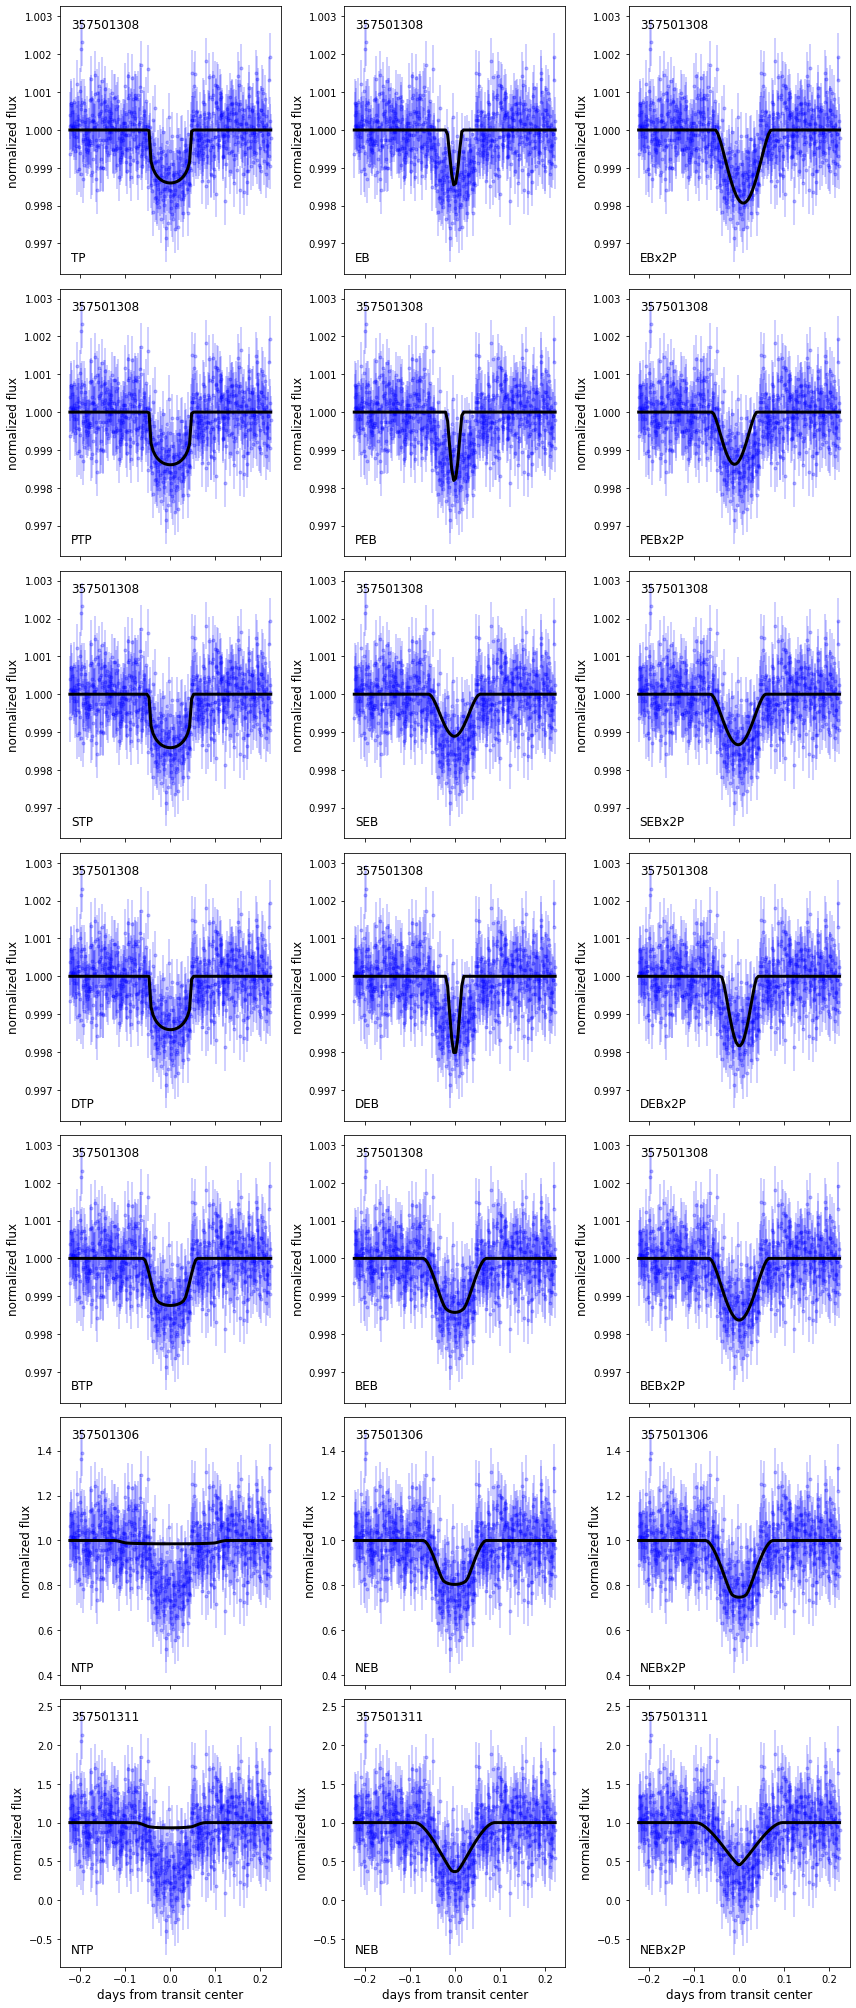

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

# Output

## Sector 51

In [10]:
# Sector 51
# Filter: g
FPP_51g = [3.631505335333074e-07, 3.3736845839182905e-07, 3.2525083271117694e-07, 1.5793149088505487e-07,
           1.414584656078688e-07, 2.2017491185799543e-07, 1.5524768359753693e-07, 1.4593973685084194e-07,
           6.240797894019323e-07, 7.586949868354509e-07, 4.762161540661225e-07, 2.732851412945436e-07,
           5.379173870778686e-07, 3.1458541505102744e-07, 7.138064740397354e-07, 6.687407230199227e-07]

NFPP_51g = [1.4456817327707985e-07, 1.2133327851423698e-07, 1.2832244661903675e-07, 1.2632897211520974e-07,
            1.1777673059105703e-07, 1.4322834320859003e-07, 1.344748791576172e-07, 1.3635418559954388e-07,
            1.2928724007596674e-07, 1.385725851168785e-07, 1.4663024583933323e-07, 1.450044382576093e-07,
            1.40364865773718e-07, 1.2802828697354244e-07, 1.4049102482462394e-07, 1.2134992795472055e-07]

print("Sector 51")
print("Filter: g")
print("   FPP  = ",np.mean(FPP_51g),"+/-",np.std(FPP_51g))
print("   NFPP = ",np.mean(NFPP_51g),"+/-",np.std(NFPP_51g))

Sector 51
Filter: g
   FPP  =  3.8836551151388843e-07 +/- 2.074672946610743e-07
   NFPP =  1.3388222649367278e-07 +/- 9.080143070421856e-09


In [11]:
# Sector 51
# Filter: i
FPP_51i = [2.0400514699758787e-07, 7.774216627121078e-07, 5.006946965924186e-07, 3.1768854713565275e-07,
           1.956153601323507e-07, 1.9591311350986018e-07, 5.823948366900922e-07, 1.7888885628369877e-07,
           1.7111416172888028e-07, 2.578653301998912e-07, 2.5283077176307955e-07, 3.926846322555022e-07,
           1.5358929572606428e-071, 1.2131167188567105e-06, 2.5538078374243156e-07]

NFPP_51i = [1.2031299410154374e-07, 1.3751377869221895e-07, 1.2750820393354196e-07, 1.5372159303988118e-07,
            1.2437033558114522e-07, 1.3933405470787005e-07, 1.1593034839106832e-07, 1.5625284487626705e-07,
            1.474914867805926e-07, 1.0183440412275446e-07, 1.2776360220860263e-07, 1.1813942583076645e-07,
            1.3698694678164716e-07, 1.4615743444382805e-07, 1.4374695777617893e-07]

print("Sector 51")
print("Filter: i")
print("   FPP  = ",np.mean(FPP_51i),"+/-",np.std(FPP_51i))
print("   NFPP = ",np.mean(NFPP_51i),"+/-",np.std(NFPP_51i))

Sector 51
Filter: i
   FPP  =  3.6637430790668426e-07 +/- 2.924351483650553e-07
   NFPP =  1.3313762741786045e-07 +/- 1.4880229851291943e-08


In [12]:
# Sector 51
# Filter: P_K
FPP_51P_K = [2.445594785571714e-07, 3.020894050465017e-07, 1.1141721677487837e-06, 2.8144319086376157e-07,
             1.3872739352827068e-06, 3.5295382128097685e-07, 2.311795995857402e-06, 2.1562814467301905e-07, 
             2.004776550323939e-07]

NFPP_51P_K = [1.2577894606629925e-07, 1.2984394148312608e-07, 1.1929815981781524e-07, 1.0278383580935818e-07,
              1.3352608952813336e-07, 1.1439777915322264e-07, 1.2741315363337143e-07, 1.0847346986928743e-07, 
              1.0190694677982226e-07]

print("Sector 51")
print("Filter: P_K")
print("   FPP  = ",np.mean(FPP_51P_K),"+/-",np.std(FPP_51P_K))
print("   NFPP = ",np.mean(NFPP_51P_K),"+/-",np.std(NFPP_51P_K))

Sector 51
Filter: P_K
   FPP  =  7.122659771491907e-07 +/- 6.980882403075181e-07
   NFPP =  1.1815803579338176e-07 +/- 1.1186137731874665e-08


In [ ]:
# Sector 51
# Filter: J
FPP_51J = []

NFPP_51J = []

print("Sector 51")
print("Filter: J")
print("   FPP  = ",np.mean(FPP_51J),"+/-",np.std(FPP_51J))
print("   NFPP = ",np.mean(NFPP_51J),"+/-",np.std(NFPP_51J))

In [13]:
# Sector 51
# Filter: S_K
FPP_51S_K = [0.00019400071312258849, 9.589132332665784e-05, 8.52144115888187e-05, 0.00015523041110931945,
             6.050361996823295e-05, 5.3197952006422966e-05, 0.00011062595135546971, 9.723530189087448e-05,
             0.00012410873045820559, 6.707021461116458e-05, 0.00017266988992348242, 0.0001163467542479868,
             0.00010834645563484457, 8.965013168882319e-05]

NFPP_51S_K = [1.1964594729072831e-07, 1.235908120892273e-07, 1.1451114216823018e-07, 1.064213154943564e-07,
              1.1185768127220063e-07, 1.2172088537141515e-07, 1.0784308535833463e-07, 1.0883902698485552e-07,
              1.0249888342411102e-07, 1.183452823431173e-07, 1.228998756986173e-07, 1.0152115487687739e-07,
              1.2954371747504746e-07, 1.1072233477921216e-07]

print("Sector 51")
print("Filter: S_K")
print("   FPP  = ",np.mean(FPP_51S_K),"+/-",np.std(FPP_51S_K))
print("   NFPP = ",np.mean(NFPP_51S_K),"+/-",np.std(NFPP_51S_K))

Sector 51
Filter: S_K
   FPP  =  0.00010929227578092084 +/- 3.9798278794851884e-05
   NFPP =  1.1428293890188078e-07 +/- 8.227215150405217e-09
